<a href="https://colab.research.google.com/github/leoanholetto1/Data-Science/blob/main/SVM_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install plotly --upgrade
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import SVC

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.7 MB/s eta 0:00:00


In [2]:
import pickle
with open('census.pkl','rb') as f:
  x_census_treinamento,  y_census_treinamento,  x_census_teste,  y_census_teste = pickle.load(f)

In [5]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [6]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [13]:
svm_census = SVC(kernel='linear',random_state=1, C = 2.0)
svm_census.fit(x_census_treinamento,y_census_treinamento)

SVC(C=2.0, kernel='linear', random_state=1)

In [14]:
previsoes = svm_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [15]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [16]:
accuracy = accuracy_score(y_census_teste,previsoes)
accuracy

0.8509723643807574

0.8509723643807574

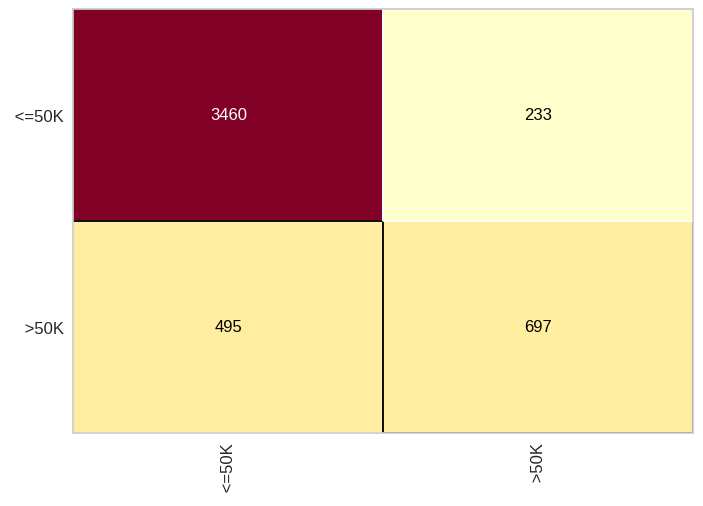

In [17]:
cm = ConfusionMatrix(svm_census)
cm.fit(x_census_treinamento,y_census_treinamento)
cm.score(x_census_teste,y_census_teste)


In [18]:
print(classification_report(y_census_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885

